In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


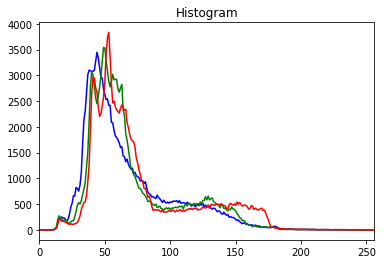

In [2]:
#(1.a) Histogram Computation
img = cv.imread('im02small.png',cv.IMREAD_COLOR)
color = ('b','g','r')
for i,c in enumerate(color):
    hist = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color = c)
    plt.xlim([0,256])
plt.title('Histogram')
plt.savefig('transform1a.png')
plt.show ()

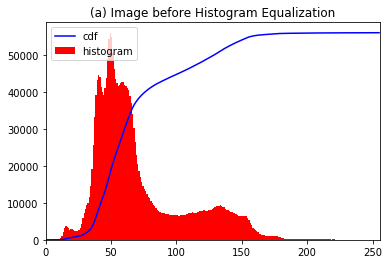

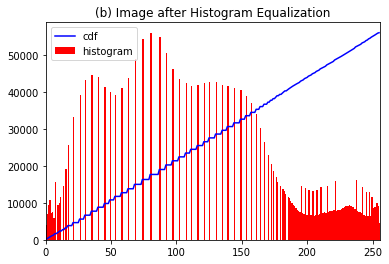

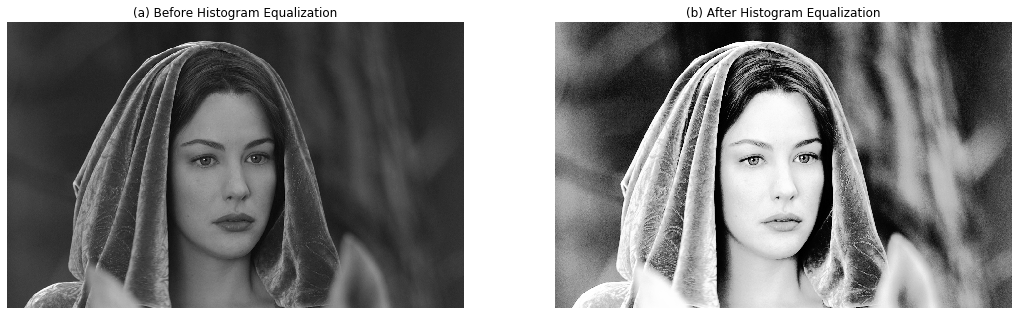

In [3]:
#(1.b) Histogram Equalization
img = cv.imread('im02.png',cv.IMREAD_GRAYSCALE)
hist,bins = np.histogram(img.ravel(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf*hist.max()/ cdf.max()
plt.plot(cdf_normalized,color = 'b')
plt.hist(img.flatten(),256,[0,256],color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc = 'upper left')
plt.title('(a) Image before Histogram Equalization')
plt.savefig('transform1b1.png')
plt.show()
equ = cv.equalizeHist(img)
hist,bins = np.histogram(equ.ravel(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf*hist.max()/ cdf.max()
plt.plot(cdf_normalized,color = 'b')
plt.hist(equ.flatten(),256,[0,256],color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc = 'upper left')
plt.title('(b) Image after Histogram Equalization')
plt.savefig('transform1b2.png')
plt.show()
fig,ax=plt.subplots(1,2,sharex='all',sharey='all',figsize=(18,18))
ax[0].imshow(img,cmap = 'gray')
ax[0].set_title('(a) Before Histogram Equalization')
ax[0].axis('off')
ax[1].imshow(equ,cmap = 'gray')
ax[1].set_title('(b) After Histogram Equalization')
ax[1].axis('off')
plt.savefig('transform1b3.png')

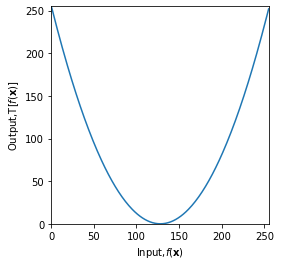

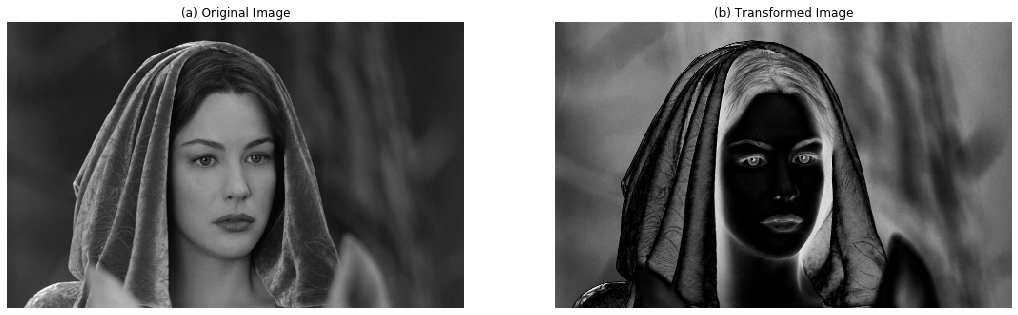

In [4]:
#(1.c) Intensity Transformations
img_orig = cv.imread('im02small.png',cv.IMREAD_GRAYSCALE)
transform = np.zeros(256)
transform[0] = 255
for i in range(1,256):
    transform[i] = ((i-128)**2)/(64)
tranform = np.uint(transform)
height = img_orig.shape[0]
width = img_orig.shape[1]
hist = np.zeros(256)
transformed_image = np.zeros([height,width])
for i in range(0,height):
    for j in range(0,width):
        transformed_image[i,j] = transform[img_orig[i,j]]
fig,ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input,$f(\mathbf{x})$')
ax.set_ylabel('Output,$\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.set_title("")
plt.savefig('transform1c.png')
plt.show()
fig,ax = plt.subplots(1,2,sharex='all',sharey='all',figsize=(18,18))
ax[0].imshow(img_orig,cmap = 'gray')
ax[0].set_title('(a) Original Image')
ax[0].axis('off')
ax[1].imshow(transformed_image,cmap = 'gray')
ax[1].set_title('(b) Transformed Image')
ax[1].axis('off')
plt.savefig('transform1c2.png')

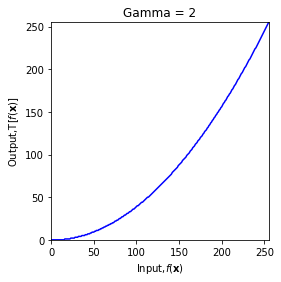

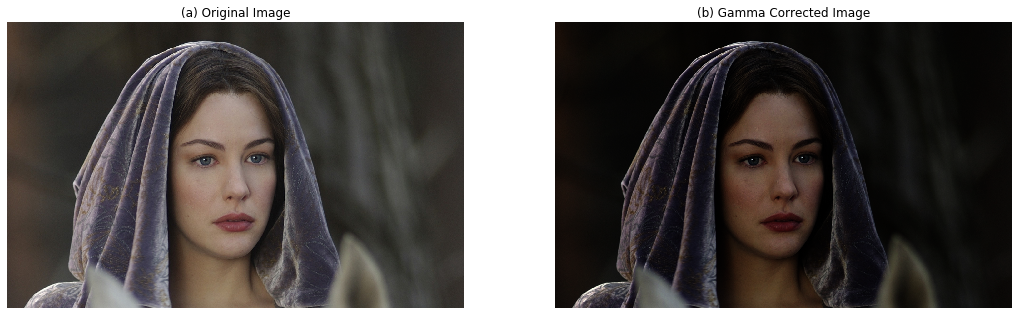

In [5]:
#(1.d) Gamma Correction
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img_orig = cv.imread ('im02.png',cv.IMREAD_COLOR)
gamma = 2
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img_orig,table)
img_orig = cv.cvtColor(img_orig,cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(img_gamma,cv.COLOR_BGR2RGB)
fig,ax = plt.subplots()
ax.plot(table,color = 'b')
ax.set_xlabel(r'Input,$f(\mathbf{x})$')
ax.set_ylabel('Output,$\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.set_title('Gamma = 2')
plt.savefig('transform1d.png')
plt.show()
fig,ax = plt.subplots(1,2,sharex='all',sharey='all',figsize=(18,18))
ax[0].imshow(img_orig,cmap = 'gray')
ax[0].set_title('(a) Original Image')
ax[0].axis('off')
ax[1].imshow(img_gamma,cmap = 'gray')
ax[1].set_title('(b) Gamma Corrected Image')
ax[1].axis('off')
plt.savefig('transform1d2.png')

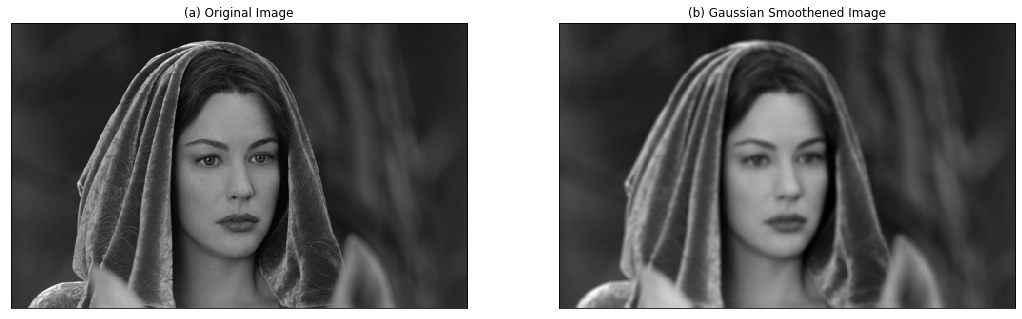

In [6]:
#(1.e) Gaussian Smoothing
img = cv.imread('im02small.png',cv.IMREAD_GRAYSCALE)
gaussianKernel = cv.getGaussianKernel(5,2)
gaussianSmoothImage = cv.sepFilter2D(img,-1,gaussianKernel,gaussianKernel)
fig,axes=plt.subplots(1,2,sharex='all',sharey='all',figsize=(18,18))
axes[0].imshow(img,cmap='gray')
axes[0].set_title('(a) Original Image')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(gaussianSmoothImage,cmap='gray')
axes[1].set_title('(b) Gaussian Smoothened Image')
axes[1].set_xticks([]),axes[1].set_yticks([])
plt.savefig('transform1e.png')

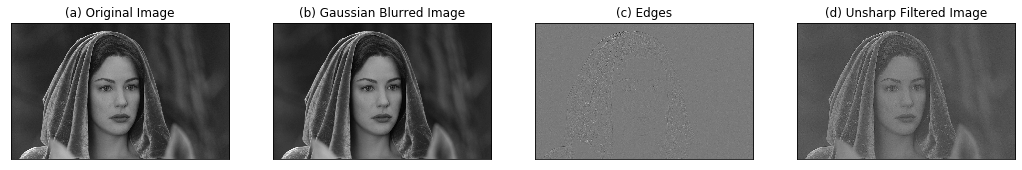

In [7]:
#(1.f) Unsharp Masking
alpha = 5
img = cv.imread('im02.png',cv.IMREAD_GRAYSCALE)
img = np.float32(img)
filteredImage = cv.GaussianBlur(img,(3,3),1)
edges = img - filteredImage
unsharpFilteredImage = img + alpha*edges
fig,axes=plt.subplots(1,4,sharex='all',sharey='all',figsize=(18,18))
axes[0].imshow(img,cmap='gray')
axes[0].set_title('(a) Original Image')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(filteredImage,cmap='gray')
axes[1].set_title('(b) Gaussian Blurred Image')
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(edges,cmap='gray')
axes[2].set_title('(c) Edges')
axes[2].set_xticks([]),axes[1].set_yticks([])
axes[3].imshow(unsharpFilteredImage,cmap='gray')
axes[3].set_title('(d) Unsharp Filtered Image')
axes[3].set_xticks([]),axes[1].set_yticks([])
plt.savefig('transform1f.png')


In [8]:
#Noise
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import cv2 as cv
import numpy as np 
from scipy import stats 

def noisy(noise_typ,image):
    if noise_typ=="gauss":
        row,col,ch=image.shape 
        mean=0
        var=100.
        sigma=var**0.5
        gauss=np.random.normal(mean,sigma,(row,col,ch))
        gauss=gauss.reshape(row,col,ch)
        noisy=image+gauss
        noisy=np.clip(noisy,0.0,255.0)
        print(stats.describe(noisy.ravel()))
        return noisy 

    elif noise_typ=="s&p":
        #row,col,ch=image.shape
        s_vs_p=0.5
        amount=0.2
        out=np.copy(image)
        #Salt mode
        num_salt=np.ceil(amount*image.size * s_vs_p)
        coords=[np.random.randint(0,i-1,int(num_salt))for i in image.shape]
        out[coords]=255

        #Pepper mode
        num_pepper=np.ceil(amount*image.size*(1.-s_vs_p))
        coords=[np.random.randint(0,i-1,int(num_pepper))for i in image.shape]
        out[coords]=0
        return out


    elif noise_typ=="poisson":
        vals=len(np.unique(image))
        vals=2**np.ceil(np.log2(vals))
        noisy=np.random.poisson(image*vals)/float(vals)
        return noisy

    elif noise_typ=="speckle":
        row,col,ch=image.shape
        gauss=np.random.randn(row,col,ch)
        gauss=gauss.reshape(row,col,ch)
        noisy=image+image*gauss
        noisy=np.clip(noisy,0.0,255.0)
        return noisy

C:\Users\Hiruna Vidumina\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\Hiruna Vidumina\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


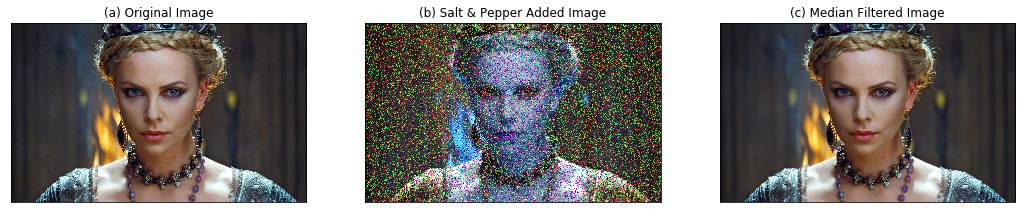

In [9]:
#(1.g) Median Filtering
img = cv.imread('im03.png',cv.IMREAD_COLOR)
kernelSize = 5
saltpepper = noisy('s&p',img)
medianfiltered_image = cv.medianBlur(saltpepper,kernelSize)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
medianfiltered_image = cv.cvtColor(medianfiltered_image,cv.COLOR_BGR2RGB)
fig,axes=plt.subplots(1,3,sharex='all',sharey='all',figsize=(18,18))
axes[0].imshow(img,cmap='gray')
axes[0].set_title('(a) Original Image')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(saltpepper,cmap='gray')
axes[1].set_title('(b) Salt & Pepper Added Image')
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(medianfiltered_image,cmap='gray')
axes[2].set_title('(c) Median Filtered Image')
axes[2].set_xticks([]),axes[1].set_yticks([])
plt.savefig('transform1g.png')

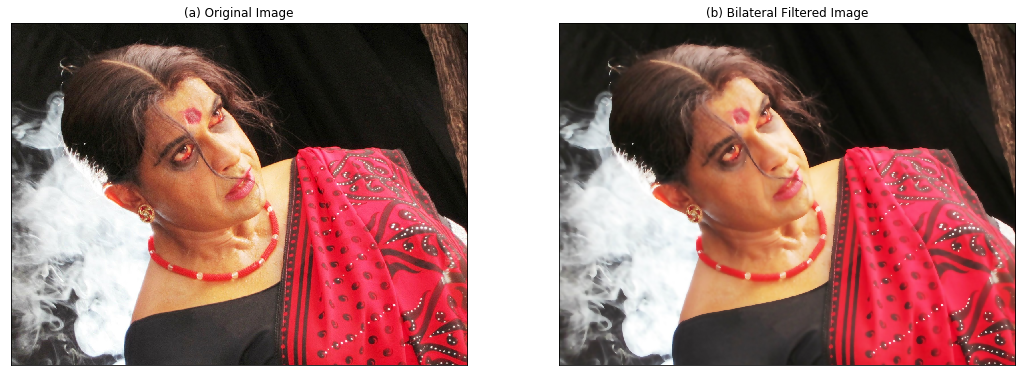

In [10]:
#(1.h) Bilateral Filtering
img = cv.imread('im09.png',cv.IMREAD_COLOR)
d = 10
sigmaColor = 75
sigmaSpace = 75
bilateralfiltered_image = cv.bilateralFilter(img,d,sigmaColor,sigmaSpace)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
bilateralfiltered_image = cv.cvtColor(bilateralfiltered_image,cv.COLOR_BGR2RGB)
fig,axes=plt.subplots(1,2,sharex='all',sharey='all',figsize=(18,18))
axes[0].imshow(img,cmap='gray')
axes[0].set_title('(a) Original Image')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(bilateralfiltered_image,cmap='gray')
axes[1].set_title('(b) Bilateral Filtered Image')
axes[1].set_xticks([]),axes[1].set_yticks([])
plt.savefig('transform1h.png')



The Total No: of Rice Grains = 100




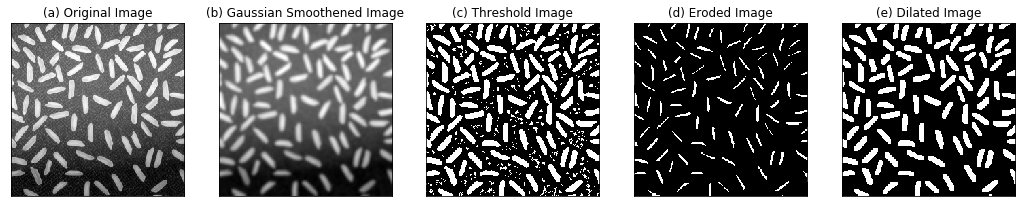

In [11]:
#(2) Counting Rice Grains
riceImage = cv.imread('rice.png',cv.IMREAD_GRAYSCALE)
kernel = np.ones((5,5),dtype="uint8")
gaussianBlurredImage = cv.GaussianBlur(riceImage,(7,7),2)
imageThreshold = cv.adaptiveThreshold(gaussianBlurredImage,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,9,0)
imageEroded = cv.erode(imageThreshold,kernel,iterations = 1)
imageDilate = cv.dilate(imageEroded,kernel,iterations = 1)
connectedOnes,labels = cv.connectedComponents(imageDilate)
riceGrains =connectedOnes - 1
print('')
print('')
print('The Total No: of Rice Grains =',riceGrains)
print('')
print('')
fig,axes=plt.subplots(1,5,sharex='all',sharey='all',figsize=(18,18))
axes[0].imshow(riceImage,cmap='gray')
axes[0].set_title('(a) Original Image')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(gaussianBlurredImage,cmap='gray')
axes[1].set_title('(b) Gaussian Smoothened Image')
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(imageThreshold,cmap='gray')
axes[2].set_title('(c) Threshold Image')
axes[2].set_xticks([]),axes[1].set_yticks([])
axes[3].imshow(imageEroded,cmap='gray')
axes[3].set_title('(d) Eroded Image')
axes[3].set_xticks([]),axes[1].set_yticks([])
axes[4].imshow(imageDilate,cmap='gray')
axes[4].set_title('(e) Dilated Image')
axes[4].set_xticks([]),axes[1].set_yticks([])
plt.savefig('transform2.png')

C:\Users\Hiruna Vidumina\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in ubyte_scalars




SSD = 209737952027.0




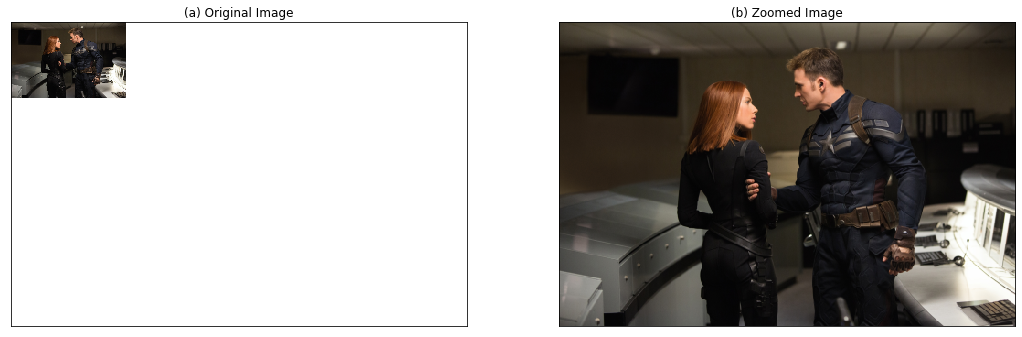

In [12]:
#(3.a) Nearest-Neighbor
def zoom(factor,img):
    height = img.shape[0]
    width = img.shape[1]
    zoomedImage = np.zeros((height*factor,width*factor,3),'uint8')
    for c in range(0,3):
        for x in range(0,height):
            for y in range(0,width):
                for i in range(x*factor,(x+1)*factor):
                    for j in range(y*factor,(y+1)*factor):
                        zoomedImage[i,j,c] = img[x,y,c]
    return zoomedImage

img = cv.imread('im08small.png',cv.IMREAD_COLOR)
factor = 4
zoomedImage = zoom(factor,img)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
zoomedImage = cv.cvtColor(zoomedImage,cv.COLOR_BGR2RGB)
zoomedOriginal =cv.imread('im08.png',cv.IMREAD_COLOR)
error = 0.0
height1 = zoomedImage.shape[0]
width1 = zoomedImage.shape[1]
for x in range(0,height1):
    for y in range(0,width1):
        for c in range(0,factor-1):
            difference = zoomedImage[x,y,c] - zoomedOriginal[x,y,c]
            error += (difference)**2
print('')
print('')
print("SSD =",error)
print('')
print('')
fig,axes=plt.subplots(1,2,sharex='all',sharey='all',figsize=(18,18))
axes[0].imshow(img,cmap='gray')
axes[0].set_title('(a) Original Image')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(zoomedImage,cmap='gray')
axes[1].set_title('(b) Zoomed Image')
axes[1].set_xticks([]),axes[1].set_yticks([])
plt.savefig('transform3a.png')

C:\Users\Hiruna Vidumina\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in ubyte_scalars




SSD = 221809406492.0




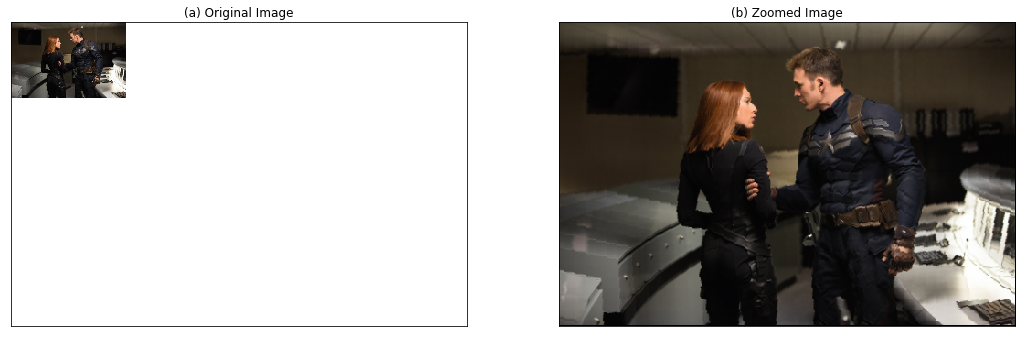

In [13]:
#(3.b)Bilinear Interplation
def onePlane(factor,p1,p2,p3,p4,c):
    zoomedSquare = np.zeros((factor,factor),np.float)
    topRow = np.linspace(p1[c],p2[c],factor)
    bottomRow = np.linspace(p3[c],p4[c],factor)
    for i in range(0,factor):
        zoomedSquare[i] = np.linspace(topRow[i],bottomRow[i],factor)
    return zoomedSquare
def getZoomedSquare(factorial,p1,p2,p3,p4):
    b = onePlane(factor,p1,p2,p3,p4,0)
    g = onePlane(factor,p1,p2,p3,p4,1)
    r = onePlane(factor,p1,p2,p3,p4,2)
    zoomedSquare = cv.merge((b,g,r))
    return zoomedSquare

img = cv.imread('im08small.png',cv.IMREAD_COLOR)
factor = 4
height = img.shape[0]
width = img.shape[1]
zoomedImage = np.zeros((height*factor,width*factor,3),'uint8')
for x in range(0,height - 1):
    for y in range(0,width - 1):
        zoomedSquare = getZoomedSquare(factor,img[x,y],img[x,y+1],img[x+1,y],img[x+1,y+1])
        for i in range(x*factor,(x+1)*factor):
            for j in range(y*factor,(y+1)*factor):
                zoomedImage[i,j] = zoomedSquare[i-x*factor,j-y*factor]
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
zoomedImage = cv.cvtColor(zoomedImage,cv.COLOR_BGR2RGB)
zoomedOriginal =cv.imread('im08.png',cv.IMREAD_COLOR)
error = 0.0
height1 =zoomedImage.shape[0]
width1 =zoomedImage.shape[1]
for x in range(0,height1):
            for y in range(0,width1):
                for c in range(0,factor-1):
                    difference = zoomedImage[x,y,c] - zoomedOriginal[x,y,c]
                    error = error + (difference)**2
print('')
print('')
print("SSD =",error)
print('')
print('')
fig,axes=plt.subplots(1,2,sharex='all',sharey='all',figsize=(18,18))
axes[0].imshow(img,cmap='gray')
axes[0].set_title('(a) Original Image')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(zoomedImage,cmap='gray')
axes[1].set_title('(b) Zoomed Image')
axes[1].set_xticks([]),axes[1].set_yticks([])
plt.savefig('transform3b.png')